In [1]:
import os
os.getcwd()

'/content'

Configuring environment


In [2]:
os.chdir('/content/drive/MyDrive/gdrive')

In [3]:
data = os.path.join(os.getcwd(), "Fraud.csv")

In [4]:
data

'/content/drive/MyDrive/gdrive/Fraud.csv'

In [5]:
import pandas as pd

In [6]:
fraud_data = pd.read_csv(data)

In [7]:
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


1 -
#Data cleaning is a crucial step in preparing a dataset for analysis. It involves addressing missing values through imputation or removal, handling outliers to ensure data integrity, and managing multi-collinearity among features to avoid misleading model interpretations.

In [8]:
fraud_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [9]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
fraud_data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [11]:
fraud_data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
fraud_data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
fraud_data['type'] = label_encoder.fit_transform(fraud_data['type'])
fraud_data['type'].unique()

array([3, 4, 1, 2, 0])

In [16]:
fraud_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,3,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,3,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,3,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,3,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,2,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


CASH_OUT    1

PAYMENT     3

CASH_IN     5

TRANSFER    4

DEBIT       2

In [17]:
merchant_trans = fraud_data[fraud_data['nameDest'].str.startswith('M')]
non_merchant_trans = fraud_data[~fraud_data['nameDest'].str.startswith('M')]


In [18]:
merchant_trans

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,3,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,3,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,3,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,3,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,3,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,3,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [19]:
merchant_trans['oldbalanceDest'] = merchant_trans['amount']
merchant_trans['newbalanceDest'] = merchant_trans['amount']

<ipython-input-19-41fb8b14f4a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_trans['oldbalanceDest'] = merchant_trans['amount']
<ipython-input-19-41fb8b14f4a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_trans['newbalanceDest'] = merchant_trans['amount']


In [20]:
fraud_data = pd.concat([non_merchant_trans, merchant_trans])


In [21]:
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
9,1,2,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0
10,1,2,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0
15,1,1,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,3,8178.01,C1213413071,11742.0,3563.99,M1112540487,8178.01,8178.01,0,0
6362314,718,3,17841.23,C1045048098,10182.0,0.00,M1878955882,17841.23,17841.23,0,0
6362316,718,3,1022.91,C1203084509,12.0,0.00,M675916850,1022.91,1022.91,0,0
6362318,718,3,4109.57,C673558958,5521.0,1411.43,M1126011651,4109.57,4109.57,0,0


In [22]:
na_values = fraud_data.isna().any()
null_values = fraud_data.isnull().any()

In [23]:
null_values

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [24]:
na_values

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [25]:
fraud_data.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.105117e+06,1.229412e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.397764e+06,3.672669e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,8.628877e+03,1.174322e+04,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327335e+05,2.146621e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [26]:
fraud_data = fraud_data.drop(columns=['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'])

In [27]:
fraud_data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,4,181.00,181.0,0.00,0.00,0.00,1
3,1,181.00,181.0,0.00,21182.00,0.00,1
9,2,5337.77,41720.0,36382.23,41898.00,40348.79,0
10,2,9644.94,4465.0,0.00,10845.00,157982.12,0
15,1,229133.94,15325.0,0.00,5083.00,51513.44,0
...,...,...,...,...,...,...,...
6362312,3,8178.01,11742.0,3563.99,8178.01,8178.01,0
6362314,3,17841.23,10182.0,0.00,17841.23,17841.23,0
6362316,3,1022.91,12.0,0.00,1022.91,1022.91,0
6362318,3,4109.57,5521.0,1411.43,4109.57,4109.57,0


<Axes: >

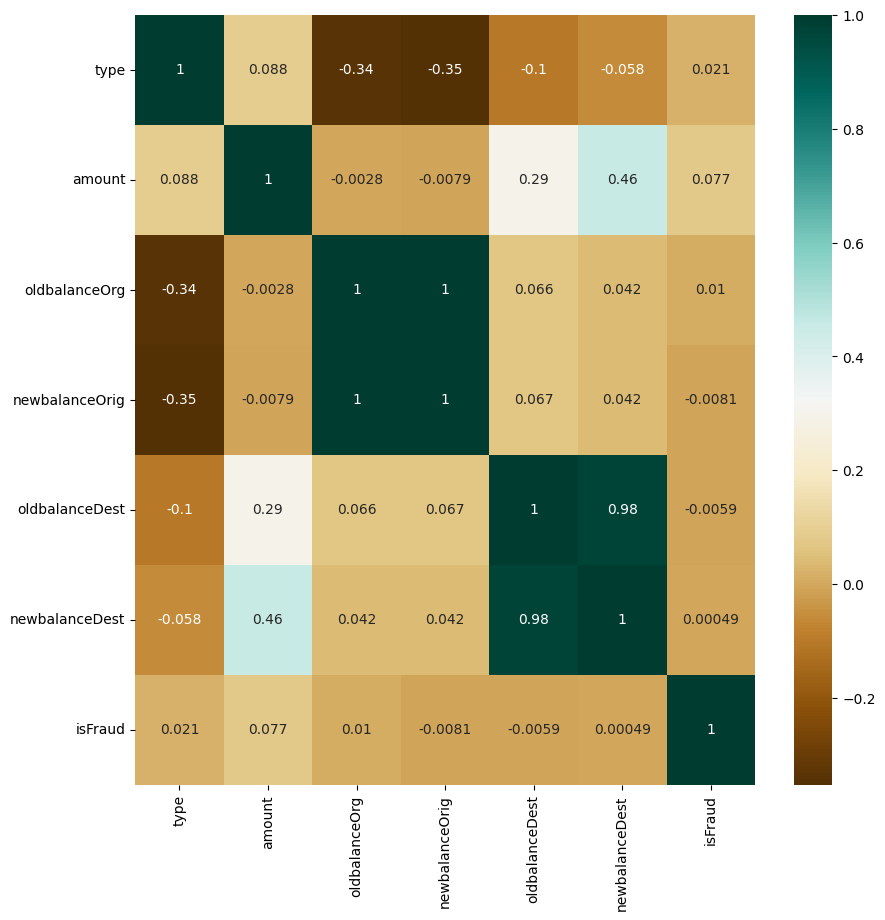

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(fraud_data.corr(),annot=True,cmap='BrBG')

2-
#Our fraud detection model is a deep neural network trained on a labeled dataset to distinguish fraudulent transactions (1) from legitimate ones (0)*italicised text*

3 - To select variables for the model, I adopted a minimalist approach and utilized a heatmap to identify collinearity among features. By analyzing the heatmap, I excluded unnecessary columns, ensuring that only relevant and uncorrelated variables were retained for effective fraud detection.

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [53]:
X = fraud_data.drop(['isFraud'],axis=1)
y = fraud_data['isFraud']

In [31]:
X_train, X_remain, y_train, y_remain = train_test_split(X,y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

In [32]:
scaler = StandardScaler()


In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [47]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 636262 entries, 2086352 to 4865688
Series name: isFraud
Non-Null Count   Dtype
--------------   -----
636262 non-null  int64
dtypes: int64(1)
memory usage: 9.7 MB


In [34]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [35]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
hist = model.fit(X_train_scaled, y_train,validation_data=(X_val_scaled, y_val), epochs=5, batch_size=128)

Epoch 1/5
39767/39767 [==============================] - 136s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 2/5
39767/39767 [==============================] - 134s 3ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 3/5
39767/39767 [==============================] - 134s 3ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 4/5
39767/39767 [==============================] - 134s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 5/5
39767/39767 [==============================] - 135s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9995


4 -
# The model's performance was demonstrated using a deep neural network with 5 epochs during training. The training set achieved a loss of 0.0029 and an accuracy of 99.94%, while the validation set obtained a loss of 0.0026 and an accuracy of 99.95%. These results indicate the model's excellent performance in accurately identifying fraudulent transactions.

5 -
#Key Factors

#Transaction Type (type): Certain transaction types, such as CASH-OUT and TRANSFER, may be more likely to be associated with fraudulent behavior.

#Transaction Amount (amount): Unusually high transaction amounts compared to typical transactions might indicate potential fraud.

#Initial Balance (oldbalanceOrg) and New Balance (newbalanceOrig) of the Originating Customer: Sudden significant changes in balances after transactions can be indicative of fraudulent activities.

#Initial Balance (oldbalanceDest) and New Balance (newbalanceDest) of the Recipient Customer: Similar to the originating customer, unusual changes in recipient balances after transactions might suggest fraudulent behavior.

#Flags (isFraud): Transactions marked as fraudulent (isFraud is 1) and those flagged as illegal attempts.

6 -
#Yes, these factors make sense for predicting fraudulent customers based on the provided dataset

In [38]:
loss, accuracy = model.evaluate(X_val_scaled, y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

19884/19884 [==============================] - 48s 2ms/step - loss: 0.0026 - accuracy: 0.9995
Validation Loss: 0.0026, Validation Accuracy: 0.9995


In [39]:
y_pred=model.predict(X_test)

19884/19884 [==============================] - 31s 2ms/step


In [40]:
y_pred

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [63]:
unique_values = np.unique(y_pred)
print(unique_values)

[0.0000000e+00 1.3645818e-38 1.6602590e-37 9.8616331e-35 9.8757884e-35
 1.6648086e-34 1.7487499e-33 2.6879224e-32 7.5622549e-32 1.0675642e-31
 7.3096847e-31 4.2234763e-30 3.3267026e-28 4.4857691e-26 2.1679611e-25
 2.1703444e-25 2.7185789e-25 1.0500671e-24 1.1210640e-20 4.3311868e-18
 3.9985964e-17 4.4242533e-17 7.8119006e-16 8.3360509e-16 5.9101114e-15
 6.7768875e-13 2.1065387e-12 2.8657424e-12 3.3808069e-12 2.7890518e-11
 1.0446141e-08 1.6401392e-08 2.2676622e-07 2.0444750e-06 2.8808495e-06
 1.8498887e-03 6.3275442e-02 9.9983776e-01 9.9995732e-01 9.9998498e-01
 1.0000000e+00]


In [64]:
threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

In [70]:
y_pred_binary

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [65]:
y_test_array = y_test.values

In [66]:
y_test_array

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
unique_values = np.unique(y_test_array)
print(unique_values)

[0 1]


In [68]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy = accuracy_score(y_test_array, y_pred_binary)
print(f'accuracy : {accuracy}')

accuracy : 0.9621932474358047


7 -
#prevention that a company updates its infrastructure for fraud prevention, it should consider implementing a multi-layered approach such as

#Transaction Monitoring: Deploy real-time transaction monitoring systems that can detect suspicious activities based on predefined rules and anomaly detection algorithms.

#Machine Learning Models: Develop and update machine learning models to detect emerging fraud patterns and adapt to new attack vectors. These models can identify previously unseen fraudulent behavior and improve accuracy over time.

#Customer Behavior Analysis: Analyze historical customer behavior to establish baseline patterns and identify deviations from normal activities. Unusual behavior, such as sudden changes in transaction frequency or location, can indicate potential fraud.

7 -
#The :company should follow a systematic evaluation process.

#Performance Metrics: Define relevant performance metrics to measure the effectiveness of the fraud prevention system.

#Testing and Validation: Perform rigorous testing and validation of the fraud prevention system using historical data or simulated scenarios

#Continuous Monitoring: Implement continuous monitoring of the system in real-time. Regularly analyze performance metrics and review flagged transactions for accuracy. Monitor any changes in fraud patterns and adapt the system accordingly.